In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('reeses_puffs.png',0) 

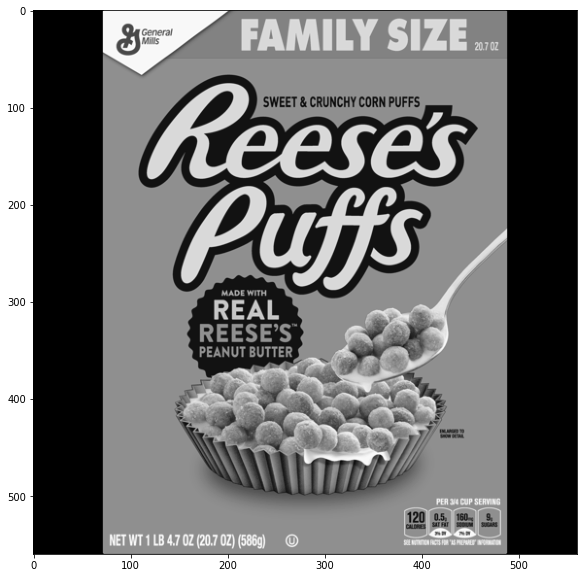

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('many_cereals.jpg',0) 

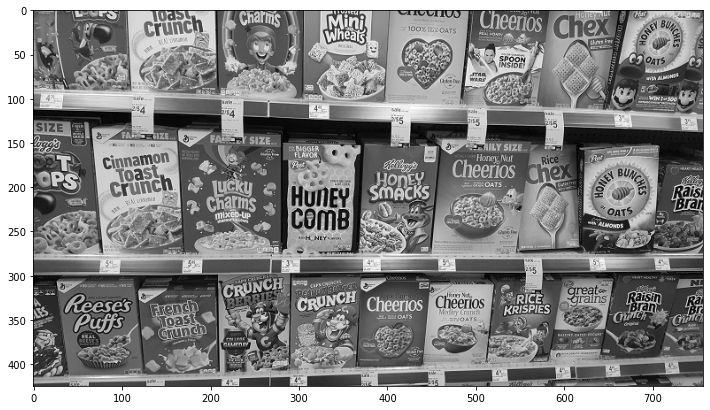

In [6]:
display(cereals)

In [7]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

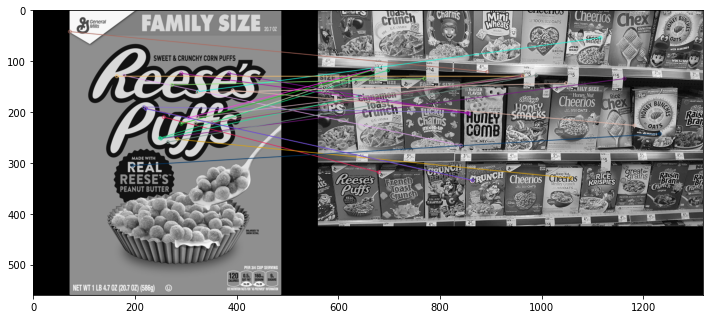

In [8]:
display(reeses_matches)

In [10]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
orb_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

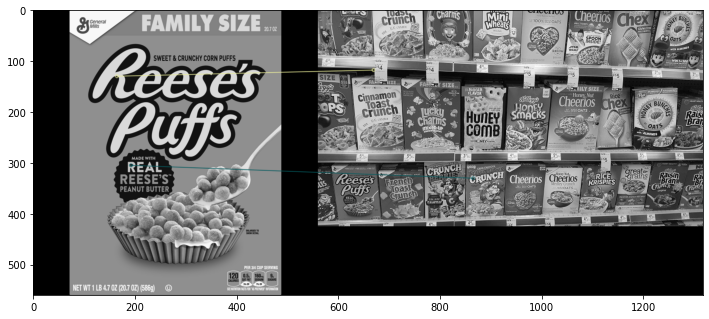

In [12]:
display(orb_matches)

In [14]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])
orb_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)

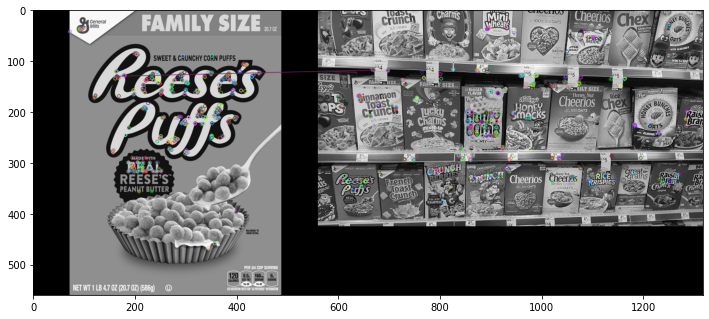

In [15]:
display(orb_matches)